In [1]:
def padding(img, pad_size):
		left_x = img[:,:pad_size,:] # h, w, c
		right_x = img[:,-pad_size:,:]
		y = img.shape[0]
		x = img.shape[1]+(pad_size*2)
		new_x = np.full((y, x, 3),255) # h w c
		new_x[:,:pad_size,:] = right_x
		new_x[:,pad_size:-pad_size,:] = img
		new_x[:,-pad_size:,:] = left_x
		return new_x

def luminance(img):
    r,g,b = img[:,:,2], img[:,:,1], img[:,:,0]
    lum =(0.114*b)+(0.587*g)+(0.299*r)
    mean_lum = np.mean(lum)
    return mean_lum
    
"""
ValueError: could not broadcast input array from shape (224,224,3) into shape (0,224,3)
blank padding (144, 452, 3)
"""
"""
72, 226, 3
(224, 72, 3
"""
def blank_padding(col_dict, img, size:list): #col_dict, q, (224,224)
    print('blank padding',img.shape)
    print(type(size))
    img = cv2.resize(img, (col_dict['size'][0], col_dict['size'][1])) #(36,113,3) into shape (36,224,3)
    print('img shape after resize', img.shape) #img shape (72, 226, 3)
    
    if img.shape[0] > size[0]:
        print('img shape 0',img.shape[0])
        img =cv2.resize(img, (img.shape[1],size[0]))
        print('img smaller than 224 224: A ', img.shape)
    if img.shape[1] > size[1]:
        print('img shape 1',img.shape[1])
        img =cv2.resize(img, (size[1], img.shape[0]))
        print('img smaller than 224 224: B', img.shape)
        #img.shape[1] = size[1]
    w = size[1]

    #w = w.shape[0]
    h = size[0]
    #h = h.shape[0]
    delta_w = w -img.shape[1] #(36, 113, 3)
    delta_h = h-img.shape[0]
    print(w, '-', img.shape[1], '=',delta_w)
    print(h, '-', img.shape[0], '=',delta_h)

    #half_delta_h = int(np.round(delta_h/2, decimals=0))
    #half_delta_w = int(np.round(delta_w/2, decimals=0))
    
    #if delta_h != 0:
    half_delta_h = int(np.floor(delta_h/2))
    #else:
    #    half_delta_h = 1
    #if delta_w != 0:
    half_delta_w = int(np.floor(delta_w/2))
    #else: half_delta_w =0
    #numpy.place(target1_label, target1_label<50, 0)
    
    
    print(delta_h,'   ',half_delta_h )
    print(delta_w,'    ',half_delta_w)
    avg_lum = int(luminance(img))
    new_x = np.full((h,w,3), avg_lum) # 224,224,3
    print('blank padding::',new_x.shape) #could not broadcast input array from shape (36,113,3) into shape (36,114,3)
    if img.shape[1]%2 ==0: # 224
        if img.shape[0]%2 == 0: #72
            if half_delta_w == 0:
                print('g')
                new_x[:,:,:] = img #half_delta_h:-half_delta_h
            else:
                
                """
                (224,224,3) into shape (0,224,3)
                """
                print('a')
                new_x[half_delta_h:-half_delta_h,half_delta_w:-half_delta_w,:] = img
        else:
            print('b')
            new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-half_delta_w,:] = img
    else:
        if img.shape[0]%2 == 0:
            print('c')
            new_x[half_delta_h:-half_delta_h,half_delta_w:-(half_delta_w+1),:] = img #*#*#
        else:
            print('d')
            new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-(half_delta_w+1),:] = img
    #print('blank padding',new_x.shape)


    return new_x

def to_tensor(img):
    im_chan = img.shape[2]
    imgy, imgx = img.shape[0], img.shape[1]
    tensor = torch.tensor(img, dtype=torch.float32)
    tensor = F.normalize(tensor)
    tensor = tensor.permute(2,0,1)
    tensor = tensor.reshape(im_chan,imgy, imgx)
    return tensor
    
def preprocess_im(col_dict, img_path:str):
    img = cv2.imread(img_path) #
    if img is not None:
        #print('1',img.shape)
        img = blank_padding(col_dict, img, (224,224))
        #print('2',img.shape)
        img = to_tensor(img).to(device)
        #print(img.shape)
        return img
    else:
        return img



In [2]:
def blank_padding(col_dict, img, final_size:list): #col_dict, q, (224,224)
    img = cv2.resize(img, (col_dict['size'][0], col_dict['size'][1])) #(36,113,3) into shape (36,224,3)

    if img.shape[0] > final_size[0]:
        img =cv2.resize(img, (img.shape[1],final_size[0]))
        
    if img.shape[1] > final_size[1]:
        img =cv2.resize(img, (final_size[1], img.shape[0]))

    w = final_size[1]
    h = final_size[0]
    
    delta_w = w -img.shape[1]
    delta_h = h-img.shape[0]

    half_delta_h = int(np.floor(delta_h/2))
    half_delta_w = int(np.floor(delta_w/2))

    avg_lum = int(luminance(img))
    new_x = np.full((h,w,3), avg_lum) 
    if img.shape[1]%2 ==0: 
        if img.shape[0]%2 == 0: 
            if half_delta_w == 0:
                new_x[:,:,:] = img 
            else:
                new_x[half_delta_h:-half_delta_h,half_delta_w:-half_delta_w,:] = img
        else:
            new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-half_delta_w,:] = img
    else:
        if img.shape[0]%2 == 0:
            new_x[half_delta_h:-half_delta_h,half_delta_w:-(half_delta_w+1),:] = img #*#*#
        else:
            new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-(half_delta_w+1),:] = img
    return new_x


In [3]:
print(72/2)
print(226/2)

36.0
113.0


In [4]:
import numpy as np
w = 224
print(w/2)
print(w-113)
print((w-113)/2)
print(w%2==0)

w= 224
h = 224
avg_lum = int(4)
delta_w = w -113 #(36, 113, 3)
delta_h = h-36

half_delta_h = int(np.floor(delta_h/2))
half_delta_w = int(np.floor(delta_w/2))

new_x = np.full((h,w,3), avg_lum) # 224,224,3
print('blank padding::',new_x.shape) #could not broadcast input array from shape (36,113,3) into shape (36,114,3)
if 113%2 ==0:
    if 36%2 == 0:
        print('a')
        new_x[half_delta_h:-half_delta_h,half_delta_w:-half_delta_w,:] = np.full((36, 113,3), 0)
    else:
        print('b')
        new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-half_delta_w,:] =np.full((36, 113,3), 0)
else:
    if 36%2 == 0:
        print('c')
        new_x[half_delta_h:-half_delta_h,half_delta_w:-(half_delta_w+1),:] = np.full((36, 113,3), 0)#*#*#
    else:
        print('d')
        new_x[half_delta_h:-(half_delta_h+1),half_delta_w:-(half_delta_w+1),:] =np.full((36, 113,3), 0)

112.0
111
55.5
True
blank padding:: (224, 224, 3)
c


In [5]:
import random
import platform
print(platform.python_version())
print('\n'.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


3.10.12
numpy==1.26.2
platform==1.0.8


In [6]:
import collections
import json
try:
    with open('testjson.json', 'r') as f:
        #obj = f.read()
        dj = json.load(f, object_pairs_hook= collections.OrderedDict) #obj, 
        print(dj)
except Exception as e:
    print("Error decoding Json")
    print(e)
    
#pp.pprint(dj)

Error decoding Json
[Errno 2] No such file or directory: 'testjson.json'


In [7]:
file_path = r'/its/home/nn268/antvis/antvis/optics/AugmentedDS_IDSW/'

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


col_dict =dict(
    pad = 5,
    colour = 'colour',
    size = [452,144] #452,144
)


x = None
for file in os.listdir(file_path):
    print(file)
    x = file
    break
print(x)
q = cv2.imread(file_path+'/'+x)

qq = padding(q, 5)

t =blank_padding(col_dict, q, (224,224))

print(t.shape)
plt.imshow(q)
plt.axis = False
plt.show()
plt.imshow(qq)
plt.show()

plt.imshow(t)
plt.axis = False
plt.show()

IDSW004_280423_1357_S_074.JPG_Augmented_left_1.JPG
IDSW004_280423_1357_S_074.JPG_Augmented_left_1.JPG


ValueError: could not broadcast input array from shape (144,224,3) into shape (224,224,3)

In [ ]:
img =q
pad_size = 80
left_x = img[:,:pad_size,:] # h, w, c
plt.imshow(left_x)
plt.show()
right_x = img[:,-pad_size:,:]
plt.imshow(right_x)
plt.show()
y = img.shape[0]
x = img.shape[1]+(pad_size*2)
new_x = np.full((y, x, 3),255) # h w c
plt.imshow(new_x)
plt.show()
new_x[:,:pad_size,:] = right_x
plt.imshow(new_x)
plt.show()
new_x[:,pad_size:-pad_size,:] = img
plt.imshow(new_x)
plt.show()
new_x[:,-pad_size:,:] = left_x

In [1]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch.optim.lr_scheduler as lr_scheduler


from loop_fns import loop, loop_og
from functions import get_data, ImageProcessor
from architectures import smallnet3

device = "cuda:0" if torch.cuda.is_available() else "cpu"

file_path = r'/its/home/nn268/antvis/antvis/optics/AugmentedDS_IDSW/'

IP = ImageProcessor(device)

x,y,xx,yy,xxx,yyy = get_data(file_path,8)
model =smallnet3(in_chan=3, f_lin_lay=67968, l_lin_lay=11, ks=[3,5], dropout=0.1).to(device) #79488
loss_fn = nn.CrossEntropyLoss()

size =[113,36]
pad =5
av_lum = IP.new_luminance(x)



col_dict ={'colour':'colour',
           'pad':5,
           'size':[113,36],
          'av_lum':av_lum}
print(col_dict.keys())
losses= []
num_c = []


lr = 0.0001

optimizer = torch.optim.Adam(model.parameters(), lr=lr)#build_optimizer(mo
#scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.2, last_epoch=-1) 

model.train()
for i in range(32):
    current_loss, predict_list, num_correct, model, optimizer = loop(model, x, y, loss_fn, device, size, pad, 11, 'twc2l', av_lum,'colour', optimizer , scheduler=None, train =True)
    #current_loss, predict_list, num_correct, model, optimizer = loop_og(model, x, y, loss_fn, device, col_dict, 11, 'twc2l', optimizer, scheduler=None, train =True)
    
    print(current_loss)
    losses.append(current_loss)
    print((num_correct/len(x))*100)
    num_c.append(num_correct/len(x)*100)
    i+=1




#print(current_loss)

dict_keys(['colour', 'pad', 'size', 'av_lum'])


/its/home/nn268/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


5182.893984556198
10.31929662193429
5176.329095721245
10.45812124016659
5160.35625731945
12.031466913465987
5098.061293125153
16.936603424340582
5054.641659855843
17.954650624710784
5019.807854056358
19.85192040721888
4974.490457057953
23.137436372049976
4941.661291480064
25.080981027302172
4908.751557588577
26.09902822767237
4873.394963264465
28.736695974086075
4817.616927146912
30.911614993058766
4785.763558268547
32.62378528459047
4745.378321886063
34.84497917630727
4732.608046293259
35.307727903748265
4731.616050958633
35.16890328551596
4698.375396609306
36.927348449791765
4678.095049023628
37.99167052290606
4651.159066200256
39.19481721425266
4646.483745455742
39.70384081443776
4628.332839727402
40.67561314206386
4627.949022293091
39.61129106894956
4615.072047710419
40.72188801480796
4597.655868291855
41.55483572420176
4593.4150133132935
42.48033317908376
4579.457852482796
43.405830633965756
4562.073313117027
43.82230448866265
4562.852807760239
44.14622859787136
4547.466993331909


[tensor(1, device='cuda:0'), tensor(4, device='cuda:0'), tensor(2, device='cuda:0'), tensor(7, device='cuda:0'), tensor(10, device='cuda:0'), tensor(10, device='cuda:0'), tensor(4, device='cuda:0'), tensor(10, device='cuda:0'), tensor(4, device='cuda:0'), tensor(4, device='cuda:0'), tensor(4, device='cuda:0'), tensor(10, device='cuda:0'), tensor(5, device='cuda:0'), tensor(0, device='cuda:0'), tensor(7, device='cuda:0'), tensor(4, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(10, device='cuda:0'), tensor(4, device='cuda:0'), tensor(5, device='cuda:0'), tensor(9, device='cuda:0'), tensor(6, device='cuda:0'), tensor(9, device='cuda:0'), tensor(0, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(10, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(1, device='cuda:0'), tensor(10, device='cuda:0'), tensor(7, device='cuda:0'), tensor(4, device='cuda:0'), tensor(7, device='cuda:0'), tensor(6, de

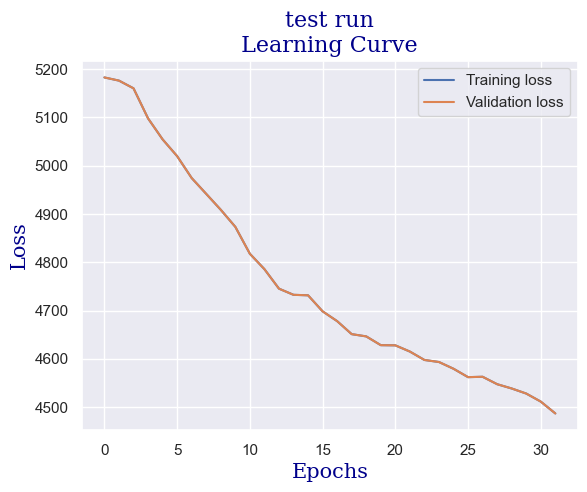

Save Location Not Specified!


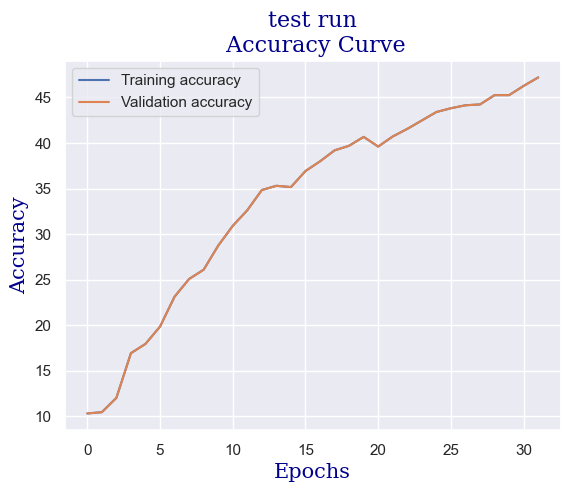

[tensor(1), tensor(4), tensor(2), tensor(7), tensor(10), tensor(10), tensor(4), tensor(10), tensor(4), tensor(4), tensor(4), tensor(10), tensor(5), tensor(0), tensor(7), tensor(4), tensor(0), tensor(1), tensor(10), tensor(4), tensor(5), tensor(9), tensor(6), tensor(9), tensor(0), tensor(1), tensor(1), tensor(10), tensor(1), tensor(1), tensor(1), tensor(10), tensor(7), tensor(4), tensor(7), tensor(6), tensor(0), tensor(4), tensor(6), tensor(6), tensor(9), tensor(4), tensor(7), tensor(6), tensor(5), tensor(4), tensor(4), tensor(5), tensor(0), tensor(7), tensor(6), tensor(1), tensor(6), tensor(9), tensor(10), tensor(1), tensor(5), tensor(10), tensor(8), tensor(4), tensor(2), tensor(10), tensor(7), tensor(5), tensor(0), tensor(6), tensor(4), tensor(4), tensor(4), tensor(7), tensor(2), tensor(9), tensor(6), tensor(6), tensor(1), tensor(5), tensor(6), tensor(2), tensor(7), tensor(4), tensor(9), tensor(5), tensor(6), tensor(1), tensor(2), tensor(10), tensor(1), tensor(6), tensor(0), tensor(1)

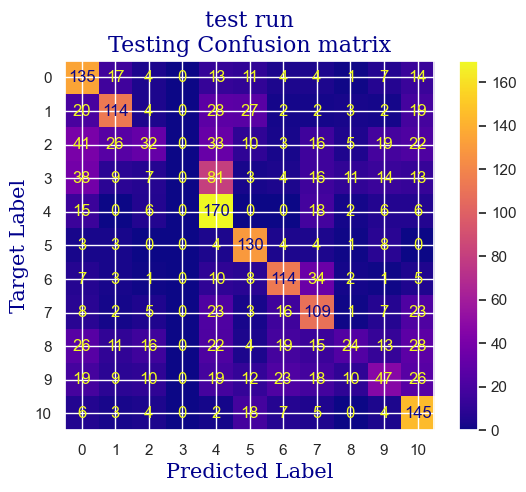

In [3]:
from plotting import learning_curve, accuracy_curve, plot_confusion

print(predict_list)
predicts=[pred.cpu() for pred in predict_list]
print(predicts)

#print(predicts)
#[print(pred.argmax) for pred in predict_list]
learning_curve(losses, v_loss=losses, save_location=None,run_name="test run")
accuracy_curve(num_c, v_accuracy_list=num_c,save_location=None,run_name="test run")
plot_confusion(predictions= predicts, actual= y, title = "Testing Confusion matrix", run_name = "test run",save_location =None)
                                    